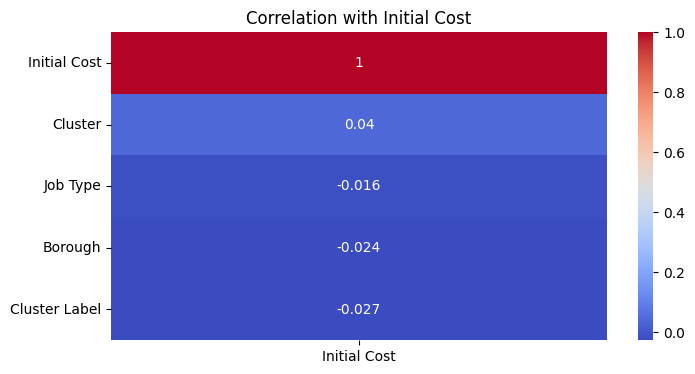

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('../data/processed_data/apartment_cluster_labeled.csv')
df.head()

df_cost = df[df['Initial Cost'].notna()].copy()
df_cost['Initial Cost'] = df_cost['Initial Cost'].replace(r"[\$,]", "", regex=True).astype(float)

# Convert object/categorical features to category codes
cols_to_check = ['Borough', 'Job Type', 'Cluster', 'Cluster Label']
for col in cols_to_check:
    if col in df_cost.columns:
        df_cost[col] = df_cost[col].astype('category').cat.codes

# Correlation matrix
corr = df_cost[['Initial Cost'] + cols_to_check].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr[['Initial Cost']].sort_values(by='Initial Cost', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Initial Cost")
plt.show()